# Разведывательный анализ лояльности по удержанию клиентов банка

## Цель разведывательного анализа

   * Банк хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы были выяснены основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

## Предобработка данных

In [68]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv') ## загружаем предоставленный dataset
copy_charn_data = churn_data.copy() # копируем данные в новую dataframe для анализа
copy_charn_data.shape # определяем объем и форму набора данных

(10000, 14)

In [69]:
copy_charn_data.head()# определяем содержание и объем набора данных

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
copy_charn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Выводы :

In [71]:
copy_charn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True) # удаляем столбцы 'RowNumber', 'CustomerId', 'Surname'
copy_charn_data['IsActiveMember'] = copy_charn_data['IsActiveMember'].astype('category') # приводим 'IsActiveMember' ктипу данных category
copy_charn_data['HasCrCard'] = copy_charn_data['HasCrCard'].astype('category') # приводим 'HasCrCard' ктипу данных category
copy_charn_data['Exited'] = copy_charn_data['Exited'].astype('category') # приводим 'Exited' ктипу данных category
cat_columns=copy_charn_data.select_dtypes(include=["object", "category"]).columns.tolist()
num_column=copy_charn_data.select_dtypes(include=np.number).columns.tolist()

In [72]:
copy_charn_data.head()# проверяем преобразование данных

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
copy_charn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


## 1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

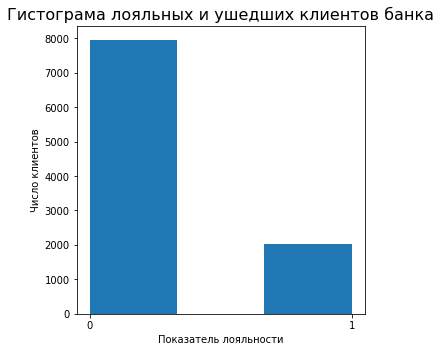

In [74]:
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=copy_charn_data['Exited'],
    bins=3
    );
axes.set_title('Гистограма лояльных и ушедших клиентов банка', fontsize=16)
axes.set_xlabel('Показатель лояльности')
axes.set_ylabel('Число клиентов')
axes.set_xticks(range(0, 2))    

### Вывод:  

## 2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
 

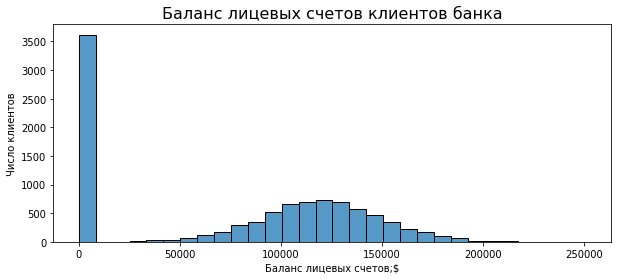

In [75]:
fig = plt.figure(figsize=(10, 4))
histplot = sns.histplot(
    x = copy_charn_data['Balance'],
    bins = 30
)
histplot.set_title('Баланс лицевых счетов клиентов банка', fontsize=16)
histplot.set_xlabel('Баланс лицевых счетов;$')
histplot.set_ylabel('Число клиентов');

### Вывод:  

## 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке. 

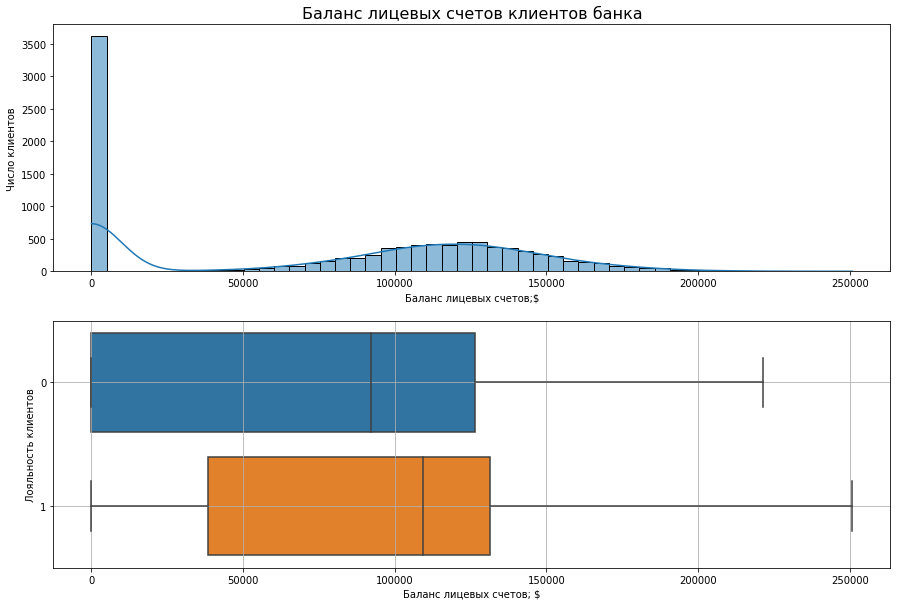

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
sns.histplot(
    data=copy_charn_data,
    x='Balance',
    bins=50,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Баланс лицевых счетов клиентов банка', fontsize=16)
axes[0].set_xlabel('Баланс лицевых счетов;$')
axes[0].set_ylabel('Число клиентов')
sns.boxplot(
    data=copy_charn_data,
    x='Balance',
    y='Exited',
    orient='h',
);
axes[1].set_xlabel('Баланс лицевых счетов; $');
axes[1].set_ylabel('Лояльность клиентов');
axes[1].grid()

### Вывод:  

## 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку? 

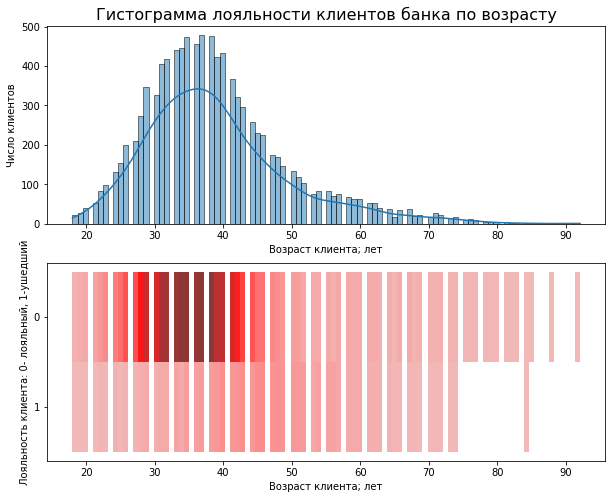

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=copy_charn_data,
    x='Age',
    bins=100,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма лояльности клиентов банка по возрасту', fontsize=16)
axes[0].set_xlabel('Возраст клиента; лет')
axes[0].set_ylabel('Число клиентов')
sns.histplot(
    data=copy_charn_data,
    x='Age',
    y='Exited',
    bins=100,
    color='red',
    ax=axes[1]
);
axes[1].set_xlabel('Возраст клиента; лет')
axes[1].set_ylabel('Лояльность клиента: 0- лояльный, 1-ушедший')
axes[1].set_yticks(range(0, 2))

### Вывод:  

## 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это. 

In [78]:
# Создаем вспомогательную таблицу, колонки которой- CreditScore, строки- Exited, а значения ячеек- EstimatedSalary
pivot = copy_charn_data.pivot_table(
    values='EstimatedSalary',
    columns='CreditScore',
    index='Exited',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

CreditScore,350,351,358,359,363,365,367,373,376,382,...,841,842,843,844,845,846,847,848,849,850
Exited,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138255.214,87630.56,39149.135,133982.515000,136830.83,108445.013333,107291.3075,130616.958,123653.063333,96853.099421
1,145503.35,169621.69,141959.11,146955.71,100615.14,81537.85,168816.73,77786.37,138340.285,179540.73,...,134378.040,87936.77,NaN,110103.183333,31726.76,35917.055000,80104.6150,NaN,170130.080000,91793.338372


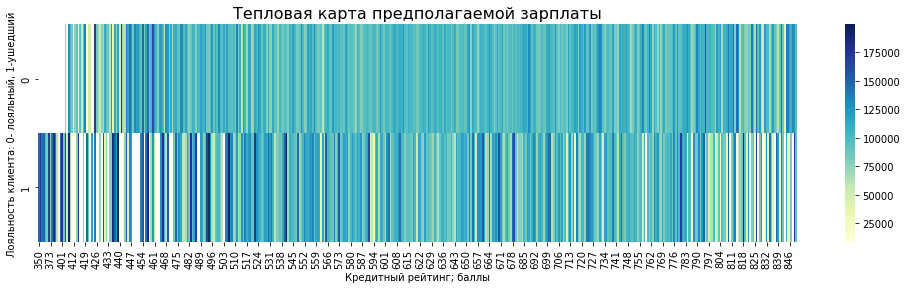

In [79]:
fig = plt.figure(figsize=(17, 4))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта предполагаемой зарплаты', fontsize=16)
heatmap.set_xlabel('Кредитный рейтинг; баллы')
heatmap.set_ylabel('Лояльность клиента: 0- лояльный, 1-ушедший');

### Вывод:  

## 6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это. 

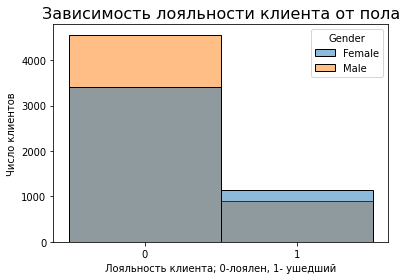

In [80]:
histplot=sns.histplot(
    data=copy_charn_data,
    x='Exited',
    hue='Gender',
    bins=3    
)
histplot.set_title('Зависимость лояльности клиента от пола', fontsize=16)
histplot.set_xlabel('Лояльность клиента; 0-лоялен, 1- ушедший')
histplot.set_ylabel('Число клиентов')
histplot.set_xticks(range(0, 2));

## 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму. 

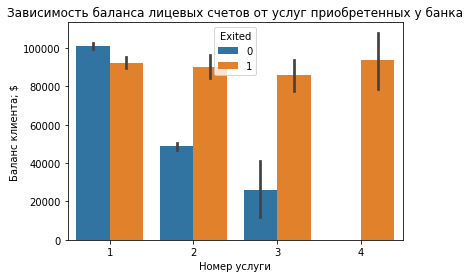

In [84]:
barplot = sns.barplot(
    data = copy_charn_data,
    x = 'NumOfProducts',
    y = 'Balance',
    hue= 'Exited' 
)
barplot.set_title('Зависимость баланса лицевых счетов от услуг приобретенных у банка')
barplot.set_xlabel('Номер услуги')
barplot.set_ylabel('Баланс клиента; $');

### Вывод:

## 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных? 

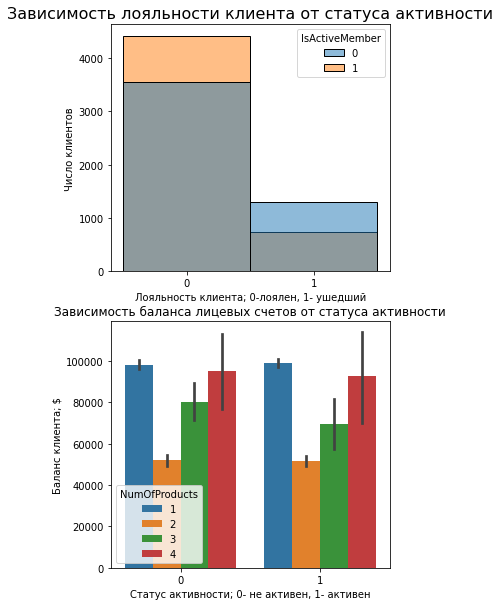

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
sns.histplot(
    data = copy_charn_data,
    x = 'Exited',
    hue = 'IsActiveMember',
    bins = 3,
    ax = axes[0]
)
axes[0].set_title('Зависимость лояльности клиента от статуса активности', fontsize=16)
axes[0].set_xlabel('Лояльность клиента; 0-лоялен, 1- ушедший')
axes[0].set_ylabel('Число клиентов')
axes[0].set_xticks(range(0, 2)
);
sns.barplot(
    data = copy_charn_data,
    x = 'IsActiveMember',
    y = 'Balance',
    hue = 'NumOfProducts',
    ax = axes[1]
)
axes[1].set_title('Зависимость баланса лицевых счетов от статуса активности')
axes[1].set_xlabel('Статус активности; 0- не активен, 1- активен')
axes[1].set_ylabel('Баланс клиента; $');

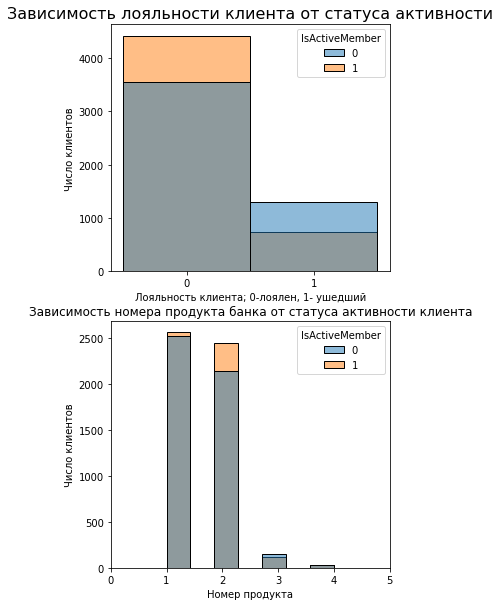

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
sns.histplot(
    data = copy_charn_data,
    x = 'Exited',
    hue = 'IsActiveMember',
    bins = 3,
    ax = axes[0]
)
axes[0].set_title('Зависимость лояльности клиента от статуса активности', fontsize=16)
axes[0].set_xlabel('Лояльность клиента; 0-лоялен, 1- ушедший')
axes[0].set_ylabel('Число клиентов')
axes[0].set_xticks(range(0, 2)
);
sns.histplot(
    data = copy_charn_data,
    x = 'NumOfProducts',
    hue = 'IsActiveMember',
    bins = 7,
    ax = axes[1]
)
axes[1].set_title('Зависимость числа клиентов от номера продукта банка')
axes[1].set_xlabel('Номер продукта')
axes[1].set_ylabel('Число клиентов')
axes[1].set_xticks(range(0, 6));

### Вывод:

## 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано. 

### Вывод:

## 10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. 

### Вывод: